## Download the image data

In [ ]:
def download_imagenette(data_dir: str, url: str =  "https://s3.amazonaws.com/fast-ai-imageclas/imagenette2-160.tgz"):
	import os

	if os.path.exists(data_dir):
		raise FileExistsError(
			f"{data_dir}/ already exists, delete it if you want to override it"
		)

	os.system(f"curl {url} -o imagenette.tgz")
	os.system("tar zxvf imagenette.tgz")
	os.system(f"mv imagenette2-160 {data_dir}")
	os.system("rm -fr imagenette.tgz")
	os.system(f"rm -f {os.path.join(data_dir, 'noisy_imagenette.csv')}")

download_imagenette("imagenette")

## Encode all the image data with CLIP

In [1]:
from clip_query import ClipQuery
import pandas as pd

/Users/donnybertucci/ClipQuery/venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/donnybertucci/ClipQuery/venv/lib/python3.8/site-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


In [2]:
df = pd.read_csv("example.csv")
df = df.sample(frac=1)
df.head()

,id,label,split
5203,train/n03888257/n03888257_18947.JPEG,parachute,train
8114,train/n03445777/n03445777_7686.JPEG,golf ball,train
6890,train/n03000684/n03000684_13356.JPEG,chainsaw,train
6632,train/n03394916/n03394916_13489.JPEG,French horn,train
3286,train/n02102040/n02102040_5746.JPEG,English Springer Spaniel,train


### Load ClipQuery

In [50]:
# loads the model in the background
# auto detects gpu or cpu
cq = ClipQuery()

### Encode the images

In [51]:
subset = df[:200]
images = cq.encode_images(
    base_path="./imagenette", image_paths=subset["id"], batch_size=16
)

13it [00:23,  1.81s/it]                        


## ClipQuery it!

For example, I want to see matches for "a picture of a dog at the beach"

In [52]:
clip_scores = cq.query(images, "a picture of a baby dog")

7it [00:00, 714.57it/s]              


In [53]:
subset["clip_scores"] = clip_scores

/var/folders/lr/70kn5pjn69bdqbrtq53m3nch0000gn/T/ipykernel_20335/2794597009.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset["clip_scores"] = clip_scores


## See top matches

In [54]:
sorted = subset.sort_values("clip_scores", ascending=False)
sorted.head()

,id,label,split,clip_scores
10716,val/n02102040/n02102040_2280.JPEG,English Springer Spaniel,valid,0.632280
7300,train/n03000684/n03000684_28509.JPEG,chainsaw,train,0.550323
3871,train/n02102040/n02102040_7898.JPEG,English Springer Spaniel,train,0.520142
3327,train/n02102040/n02102040_2864.JPEG,English Springer Spaniel,train,0.484216
3719,train/n02102040/n02102040_1266.JPEG,English Springer Spaniel,train,0.447574


### Show the top image matches

legit!


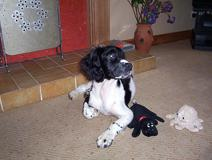

In [55]:
from PIL import Image
import os
print("legit!")
Image.open(os.path.join("imagenette", sorted.iloc[0]["id"]))

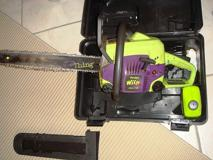

In [56]:
Image.open(os.path.join("imagenette", sorted.iloc[1]["id"]))

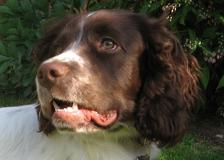

In [57]:
Image.open(os.path.join("imagenette", sorted.iloc[2]["id"]))

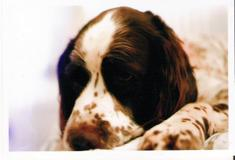

In [58]:
Image.open(os.path.join("imagenette", sorted.iloc[3]["id"]))